In [1]:
from juliacall import Main as jl

Querying Julia versions from https://julialang-s3.julialang.org/bin/versions.json
Found Julia 1.7.1 at 'julia'


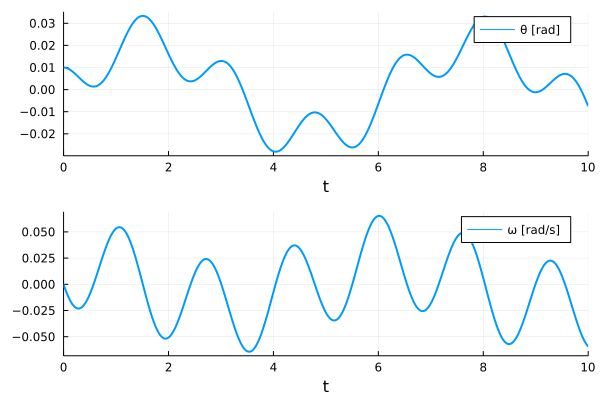

In [2]:
# Takes a while the first time while things precompile
jl.evalfile("julia_scripts/pendulum.jl")

## Some deets

In [3]:
import juliacall as jc

In [4]:
jc.CONFIG

{'embedded': False,
 'dev': False,
 'jlenv': '/home/mango/Projects/juliacall_example/py2jl/envs/julia_env',
 'meta': '/home/mango/Projects/juliacall_example/py2jl/envs/julia_env/PythonCallPyMeta',
 'exever': '1.7.1',
 'exepath': 'julia',
 'libpath': '/home/mango/julia-1.7.1/lib/libjulia.so.1',
 'lib': <CDLL '/home/mango/julia-1.7.1/lib/libjulia.so.1', handle 56082c9eb9b0 at 0x7f6e3fc566e0>}

In [5]:
jc.Pkg.status()

      Status `~/Projects/juliacall_example/py2jl/envs/julia_env/Project.toml`
  [0c46a032] DifferentialEquations v7.0.0
  [b8a86587] NearestNeighbors v0.4.9
  [91a5bcdd] Plots v1.25.4
  [6099a3de] PythonCall v0.4.3


# Tree stuff

In [6]:
import numpy as np
from scipy.spatial import KDTree as KDTree

## the data

In [7]:
data = np.random.random((1000, 3))
query = np.array([0.5, 0.5, 0.5])

# python version

In [8]:
def knn_py(data, query, k=3):
    tree = KDTree(data)
    return tree.query(query, k=k)

In [9]:
def knn_precomputed_py(tree, query, k=3):
    return tree.query(query, k=k)

In [10]:
results_py = knn_py(data, query)

tree_py = KDTree(data)
results_precomputed_py = knn_precomputed_py(tree_py, query)

print(results_py[0], results_py[1])
print(results_precomputed_py[0], results_precomputed_py[1])
print(np.array_equal(results_py, results_precomputed_py))

[0.0649772  0.0949168  0.09702319] [866 588 524]
[0.0649772  0.0949168  0.09702319] [866 588 524]
True


In [11]:
%timeit knn_py(data, query)

165 µs ± 2.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [12]:
%timeit knn_precomputed_py(tree_py, query)

16.3 µs ± 699 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# using juliacall

In [13]:
jl.seval("using NearestNeighbors")

In [14]:
def knn_jl(data, query, k=3):
    return jl.knn(jl.KDTree(data), query, k, True)

In [15]:
def knn_precomputed_jl(kdtree, query, k=3):
    return jl.knn(kdtree, query, k, True)

In [16]:
data_t = data.transpose() # Not timing this part
results_jl = knn_jl(data_t, query)

tree_jl = jl.KDTree(data_t)
results_precomputed_jl = knn_precomputed_jl(tree_jl, query)

print(results_jl[1], results_jl[0])
print(results_precomputed_jl[1], results_precomputed_jl[0])
print(np.array_equal(results_jl, results_precomputed_jl))

[0.06497720291337057, 0.0949167968854452, 0.09702318842898745] [867, 589, 525]
[0.06497720291337057, 0.0949167968854452, 0.09702318842898745] [867, 589, 525]
True


In [17]:
%timeit knn_jl(data_t, query)

210 µs ± 7.25 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [18]:
%timeit knn_precomputed_jl(tree_jl, query)

62.1 µs ± 1.55 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
